In [1]:
import random
import json
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

from PIL import Image as PILImage
import io
from typing import Type
import copy

In [2]:
class Edge:
    def __init__(self, d, node1, node2):
        self.d = d
        self.id = random.getrandbits(64)
        self.node1 = node1
        self.node2 = node2

    def __hash__(self):
        return hash(self.id)

    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.id == other.id

In [3]:
class Graph_node:
    def __init__(self, name, h):
        self.name = name
        self.h = h
        self.id = random.getrandbits(64)
        self.nodes = {}

    def add_nodes(self, nodes, ds):
        if len(nodes) != len(ds):
            return
        for i, node in enumerate(nodes):
            edge = Edge(ds[i], self, node)
            self.nodes[edge] = node

    def get_state(self):
        return (self.name, self.h)

    def __hash__(self):
        return hash(self.id)

    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.id == other.id

In [4]:
class Graph:
    def __init__(self, root_node, directed):
        self.root_node = root_node
        self.directed = directed

    def get_nodes(self):
        cur_nodes = [self.root_node]
        visited_edges = set()
        visited_nodes = set()
        while len(cur_nodes) > 0:
            cur_node = cur_nodes.pop(0)
            for edge in cur_node.nodes:
                node = cur_node.nodes[edge]

                if edge in visited_edges:
                    continue

                visited_edges.add(edge)

                if node in visited_nodes:
                    node = None
                else:
                    visited_nodes.add(node)
                    cur_nodes.append(node)
                yield node, edge

    def to_network(self):
        nodes = []
        edges = []
        for node, edge in self.get_nodes():
            if node:
                nodes.append({"id": node.id, "data": node.get_state()})
            edges.append(
                {
                    "source": edge.node1.id,
                    "target": edge.node2.id,
                    "id": edge.id,
                    "label": edge.d,
                }
            )

        return {"nodes": nodes, "edges": edges, "directed": self.directed}

    def draw_networkx(self):
        g = nx.DiGraph() if self.directed else nx.Graph()
        labels = {}
        for _, edge in self.get_nodes():
            node1_label = edge.node1.name + str(edge.node1.h)
            node2_label = edge.node2.name + str(edge.node2.h)
            g.add_edge(node1_label, node2_label)
            labels[(node1_label, node2_label)] = str(edge.d)

        _, ax = plt.subplots(figsize=(10, 10))
        pos = nx.kamada_kawai_layout(g)
        nx.draw_networkx(
            g,
            pos,
            node_size=2000,
            font_size=18,
            node_color="white",
            edgecolors="black",
            ax=ax,
        )
        nx.draw_networkx_edge_labels(g, pos, font_size=18, edge_labels=labels, ax=ax)

    def draw_viz(self):
        g = (
            graphviz.Digraph(format="jpg")
            if self.directed
            else graphviz.Graph(format="jpg")
        )
        for node, edge in self.get_nodes():
            if node:
                g.node(node.name + str(node.h))
            g.edge(
                edge.node1.name + str(edge.node1.h),
                edge.node2.name + str(edge.node2.h),
                label=str(edge.d),
            )
        img = PILImage.open(io.BytesIO(g.pipe()))
        _ = plt.figure(figsize=(12, 12))
        plt.imshow(img)

In [5]:
node_S = Graph_node("S", 5)
node_A = Graph_node("A", 7)
node_B = Graph_node("B", 3)
node_C = Graph_node("C", 4)
node_D = Graph_node("D", 6)
node_E = Graph_node("E", 5)
node_F = Graph_node("F", 6)
node_G1 = Graph_node("G1", 0)
node_G2 = Graph_node("G2", 0)
node_G3 = Graph_node("G3", 0)

In [6]:
node_S.add_nodes([node_A, node_B, node_D], [5, 9, 6])
node_A.add_nodes([node_B, node_G1], [3, 9])
node_B.add_nodes([node_A, node_C], [2, 1])
node_C.add_nodes([node_S, node_F, node_G2], [6, 7, 5])
node_D.add_nodes([node_C, node_E, node_S], [2, 2, 1])
node_E.add_nodes([node_G3], [7])
node_F.add_nodes([node_D, node_G3], [2, 8])

In [7]:
graph = Graph(node_S, True)

In [8]:
graph_network = graph.to_network()
print(f"%network {json.dumps(graph_network)}")

%network {"nodes": [{"id": 12140643078772536207, "data": ["A", 7]}, {"id": 12908507739556492386, "data": ["B", 3]}, {"id": 14973390614110238925, "data": ["D", 6]}, {"id": 17067257189373594884, "data": ["G1", 0]}, {"id": 16262503019121912612, "data": ["C", 4]}, {"id": 9512760048867677423, "data": ["E", 5]}, {"id": 572037535012220261, "data": ["S", 5]}, {"id": 9919614382284269509, "data": ["F", 6]}, {"id": 14662769687202471999, "data": ["G2", 0]}, {"id": 3171333902830853882, "data": ["G3", 0]}], "edges": [{"source": 572037535012220261, "target": 12140643078772536207, "id": 1004615388992437743, "label": 5}, {"source": 572037535012220261, "target": 12908507739556492386, "id": 14475187234287602793, "label": 9}, {"source": 572037535012220261, "target": 14973390614110238925, "id": 1121921308536779172, "label": 6}, {"source": 12140643078772536207, "target": 12908507739556492386, "id": 1624487053538452438, "label": 3}, {"source": 12140643078772536207, "target": 17067257189373594884, "id": 61545

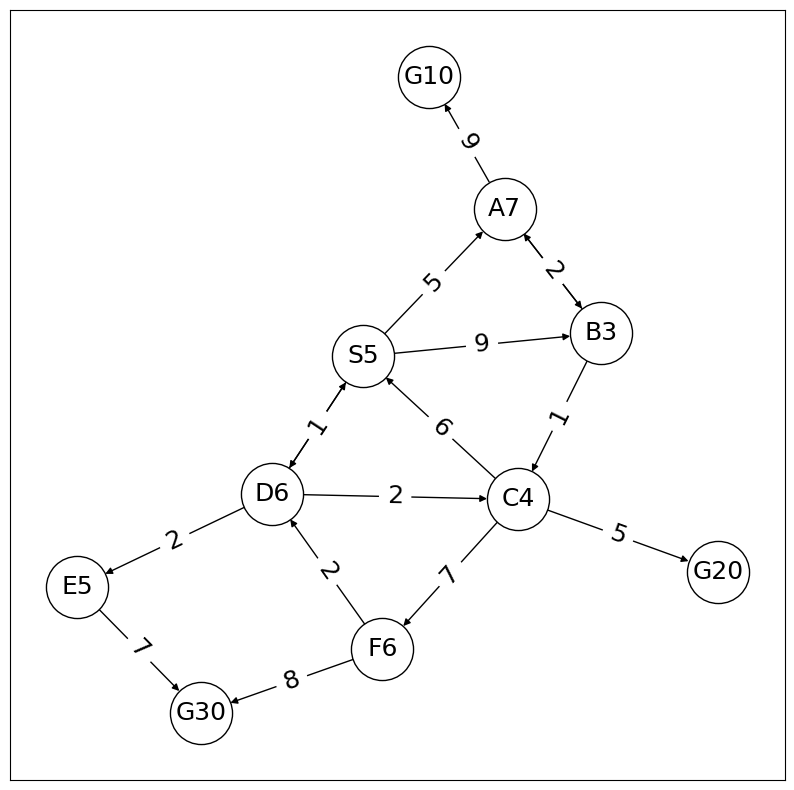

In [9]:
graph.draw_networkx()

In [24]:
graph.draw_viz()

In [11]:
class Any:
    def __init__(self, *vals):
        self.vals = vals

    def __eq__(self, other):
        if len(self.vals) == 0 or other in self.vals:
            return True
        return False

In [12]:
class Problem:
    def __init__(self):
        self.goal = None

    def get_state(self):
        pass

    def get_pos_actions(self):
        pass

    def action(self, actions):
        pass

    def cost(self, action):
        pass

In [13]:
class PathFinding(Problem):
    def __init__(self, graph: Graph, *goal_names):
        self.graph = graph
        self.loc = graph.root_node
        self.goal = (Any(*goal_names), Any())

    def get_state(self):
        return self.loc.get_state()

    def get_pos_actions(self):
        for edge in self.loc.nodes:
            yield edge

    def action(self, actions):
        Problem.action(self, actions)

        for action in actions:
            if action not in self.get_pos_actions():
                continue

            if action.node1 != self.loc:
                raise Exception(f"Cannot do action!")

            self.loc = action.node2

    def cost(self, action):
        return action.d

In [14]:
class Node:
    def __init__(self, state, cost, parent_node, action):
        self.state = state
        self.cost = cost
        self.action = action
        self.parent_node = parent_node

    def get_actions(self):
        actions = []
        node = self

        while node:
            if node.action:
                actions.append(node.action)
            node = node.parent_node

        return list(reversed(actions))

In [15]:
class Problem_solver:
    def __init__(self):
        pass

    def train(self, problem: Type[Problem]):
        pass

    def solve(self):
        pass

In [17]:
class A_star_solver(Problem_solver):
    def __init__(self):
        Problem_solver.__init__(self)

    def evaluate(self, node: Node):
        return node.cost + node.state[1]

    def train(self, problem: Type[Problem]):
        Problem_solver.train(self, problem)
        self.problem = problem

    def solve(self):
        Problem_solver.solve(self)
        node = self.__search()
        return node.get_actions()

    def __search(self):
        start_state = self.problem.get_state()
        start_node = Node(start_state, 0, None, None)
        open_set = {start_node}
        closed_set = set()

        while open_set:
            current_node = min(open_set, key=lambda node: self.evaluate(node))

            if current_node.state[0] in self.problem.goal[0].vals:
                return current_node

            open_set.remove(current_node)
            closed_set.add(current_node)

            for successor in self.expand(current_node):
                if successor in closed_set:
                    continue

                if successor not in open_set:
                    open_set.add(successor)
                else:
                    existing_node = next(node for node in open_set if node == successor)
                    if existing_node.cost > successor.cost:
                        open_set.remove(existing_node)
                        open_set.add(successor)

        return None



    def get_problem_after_action(self, actions):
        problem = copy.deepcopy(self.problem)
        problem.action(actions)
        return problem

    def expand(self, node):
        actions = node.get_actions()
        problem = self.get_problem_after_action(actions)
        pos_actions = list(problem.get_pos_actions())

        for action in pos_actions:
            action_cost = problem.cost(action)
            problem.action([action])
            cur_state = problem.get_state()
            yield Node(cur_state, node.cost + action_cost, node, action)
            problem = self.get_problem_after_action(actions)

In [18]:
problem = PathFinding(graph, "G1", "G2", "G3")

solver = A_star_solver()
solver.train(problem)
edges = solver.solve()

In [19]:
for edge in edges:
    print(f"Go from {edge.node1.name} to {edge.node2.name}")

Go from S to D
Go from D to C
Go from C to G2
